In [16]:
from keras.layers import Conv2D, InputLayer, UpSampling2D
import numpy as np
import csv
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.viewer import ImageViewer
from skimage.io import imsave

%matplotlib inline

In [2]:
img= load_img('woman.jpg')

(400, 400, 3)


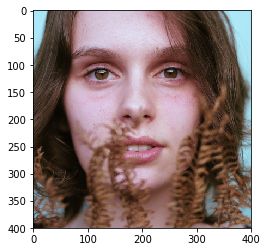

In [3]:
plt.imshow(img)
image= img_to_array(img)
#print(image)
print(image.shape)

In [5]:
print(image.shape)

(400, 400, 3)


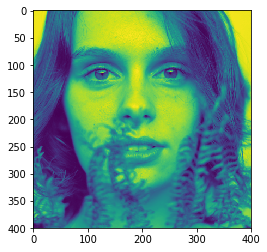

In [23]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
plt.imshow(X)
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [24]:
model= Sequential()
model.add(InputLayer(input_shape =(None, None, 1)))
model.add(Conv2D(8, (3,3), padding='same', activation='relu', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [25]:
model.compile(optimizer='rmsprop',loss='mse')

In [59]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 367ms/step - loss: 0.0040
Epoch 2/500
1/1 [==============================] - 0s 374ms/step - loss: 0.0028
Epoch 3/500
1/1 [==============================] - 0s 362ms/step - loss: 0.0025
Epoch 4/500
1/1 [==============================] - 0s 363ms/step - loss: 0.0025
Epoch 5/500
1/1 [==============================] - 0s 366ms/step - loss: 0.0033
Epoch 6/500
1/1 [==============================] - 0s 352ms/step - loss: 0.0047
Epoch 7/500
1/1 [==============================] - 0s 376ms/step - loss: 0.0046
Epoch 8/500
1/1 [==============================] - 0s 356ms/step - loss: 0.0048
Epoch 9/500
1/1 [==============================] - 0s 386ms/step - loss: 0.0048
Epoch 10/500
1/1 [==============================] - 0s 399ms/step - loss: 0.0037
Epoch 11/500
1/1 [==============================] - 0s 410ms/step - loss: 0.0031
Epoch 12/500
1/1 [==============================] - 0s 382ms/step - loss: 0.0027
Epoch 13/500
1/1 [===================

Epoch 103/500
1/1 [==============================] - 0s 393ms/step - loss: 0.0016
Epoch 104/500
1/1 [==============================] - 0s 409ms/step - loss: 0.0022
Epoch 105/500
1/1 [==============================] - 0s 387ms/step - loss: 0.0027
Epoch 106/500
1/1 [==============================] - 0s 425ms/step - loss: 0.0026
Epoch 107/500
1/1 [==============================] - 0s 380ms/step - loss: 0.0048
Epoch 108/500
1/1 [==============================] - 0s 357ms/step - loss: 0.0033
Epoch 109/500
1/1 [==============================] - 0s 357ms/step - loss: 0.0031
Epoch 110/500
1/1 [==============================] - 0s 353ms/step - loss: 0.0021
Epoch 111/500
1/1 [==============================] - 0s 366ms/step - loss: 0.0016
Epoch 112/500
1/1 [==============================] - 0s 371ms/step - loss: 0.0015
Epoch 113/500
1/1 [==============================] - 0s 394ms/step - loss: 0.0015
Epoch 114/500
1/1 [==============================] - 0s 364ms/step - loss: 0.0015
Epoch 115/500
1/

Epoch 203/500
1/1 [==============================] - 0s 432ms/step - loss: 0.0029
Epoch 204/500
1/1 [==============================] - 0s 436ms/step - loss: 0.0019
Epoch 205/500
1/1 [==============================] - 0s 429ms/step - loss: 0.0021
Epoch 206/500
1/1 [==============================] - 0s 487ms/step - loss: 0.0014
Epoch 207/500
1/1 [==============================] - 0s 463ms/step - loss: 0.0014
Epoch 208/500
1/1 [==============================] - 0s 483ms/step - loss: 0.0017
Epoch 209/500
1/1 [==============================] - 0s 425ms/step - loss: 0.0014
Epoch 210/500
1/1 [==============================] - 1s 523ms/step - loss: 0.0013
Epoch 211/500
1/1 [==============================] - 0s 433ms/step - loss: 0.0011
Epoch 212/500
1/1 [==============================] - 0s 479ms/step - loss: 0.0010
Epoch 213/500
1/1 [==============================] - 0s 429ms/step - loss: 0.0010
Epoch 214/500
1/1 [==============================] - 1s 505ms/step - loss: 0.0011
Epoch 215/500
1/

1/1 [==============================] - 0s 383ms/step - loss: 8.6493e-04
Epoch 302/500
1/1 [==============================] - 0s 382ms/step - loss: 9.4252e-04
Epoch 303/500
1/1 [==============================] - 0s 394ms/step - loss: 0.0013
Epoch 304/500
1/1 [==============================] - 0s 409ms/step - loss: 0.0011
Epoch 305/500
1/1 [==============================] - 0s 418ms/step - loss: 0.0020
Epoch 306/500
1/1 [==============================] - 0s 440ms/step - loss: 0.0017
Epoch 307/500
1/1 [==============================] - 0s 416ms/step - loss: 0.0043
Epoch 308/500
1/1 [==============================] - 0s 403ms/step - loss: 0.0018
Epoch 309/500
1/1 [==============================] - 0s 408ms/step - loss: 0.0011
Epoch 310/500
1/1 [==============================] - 0s 412ms/step - loss: 8.6619e-04
Epoch 311/500
1/1 [==============================] - 0s 406ms/step - loss: 7.5226e-04
Epoch 312/500
1/1 [==============================] - 0s 389ms/step - loss: 7.0198e-04
Epoch 313/

Epoch 398/500
1/1 [==============================] - 0s 412ms/step - loss: 9.9770e-04
Epoch 399/500
1/1 [==============================] - 0s 455ms/step - loss: 0.0013
Epoch 400/500
1/1 [==============================] - 0s 413ms/step - loss: 0.0015
Epoch 401/500
1/1 [==============================] - 0s 459ms/step - loss: 0.0012
Epoch 402/500
1/1 [==============================] - 0s 381ms/step - loss: 0.0010
Epoch 403/500
1/1 [==============================] - 0s 485ms/step - loss: 9.1616e-04
Epoch 404/500
1/1 [==============================] - 1s 521ms/step - loss: 8.7182e-04
Epoch 405/500
1/1 [==============================] - 1s 502ms/step - loss: 6.1007e-04
Epoch 406/500
1/1 [==============================] - 1s 526ms/step - loss: 5.9285e-04
Epoch 407/500
1/1 [==============================] - 1s 510ms/step - loss: 5.7394e-04
Epoch 408/500
1/1 [==============================] - 1s 531ms/step - loss: 6.0070e-04
Epoch 409/500
1/1 [==============================] - 1s 527ms/step - l

1/1 [==============================] - 0s 390ms/step - loss: 6.5435e-04
Epoch 495/500
1/1 [==============================] - 0s 393ms/step - loss: 5.9284e-04
Epoch 496/500
1/1 [==============================] - 0s 364ms/step - loss: 7.0843e-04
Epoch 497/500
1/1 [==============================] - 0s 408ms/step - loss: 8.5024e-04
Epoch 498/500
1/1 [==============================] - 0s 425ms/step - loss: 0.0011
Epoch 499/500
1/1 [==============================] - 0s 417ms/step - loss: 0.0016
Epoch 500/500
1/1 [==============================] - 0s 423ms/step - loss: 0.0014


In [27]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output= output*128
print(output.shape)

1/1 [==============================] - 0s 147ms/step
0.003963676281273365
(1, 400, 400, 2)


In [29]:
op= np.zeros((400, 400, 3))
op[:,:,0]= X[0, :, :, 0]
op[:,:,1:]= output[0]
print(op.shape)

(400, 400, 3)


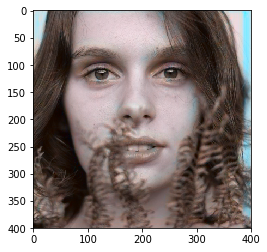

In [32]:
op= lab2rgb(op)
plt.imshow(op)

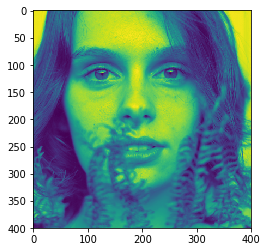

In [36]:
plt.imshow(rgb2gray(op))

1/1 [==============================] - 0s 80ms/step
0.0032282820902764797


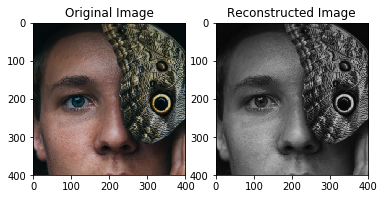

In [58]:
img2= load_img('man.jpg')
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img2)
image2= img_to_array(img2)
X1= rgb2lab(1.0/255*image2)[:, :, 0]
Y1= rgb2lab(1.0/255*image2)[:, :, 1:]
Y1= Y1/128
X1= X1.reshape((1, 400, 400, 1))
Y1= Y1.reshape((1, 400, 400, 2))
print(model.evaluate(X1, Y1, batch_size=1))
output= model.predict(X1)
op= np.zeros((400, 400, 3))
op[:,:,0]= X1[0, :, :, 0]
op[:,:,1:]= output[0]
op= lab2rgb(op)
plt.subplot(1,2,2)
plt.title('Reconstructed Image')
plt.imshow(op)